# Medidas de dispersión

continuamos con el dataset https://www.kaggle.com/lepchenkov/usedcarscatalog

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cars.csv')

In [2]:
# Desviación estandar
df['price_usd'].std()

6428.1520182029035

In [3]:
# Rango = valor max - valor min
rango = df['price_usd'].max() - df['price_usd'].min()
rango

49999.0

In [4]:
# Quartiles
median = df['price_usd'].median()
Q1 = df['price_usd'].quantile(q=0.25)
Q3 = df['price_usd'].quantile(q=0.75)
min_val = df['price_usd'].quantile(q=0)
max_val = df['price_usd'].quantile(q=1.0)
print(min_val, Q1, median, Q3, max_val)

1.0 2100.0 4800.0 8990.0 50000.0


In [5]:
iqr = Q3 - Q1
iqr

6890.0

### Límites para detección de outliers (datos simetricamente distribuidos)

Datos entre $$Q_1 -1.5 \times \text{IQR}$$ y $$Q_3 + 1.5 \times \text{IQR}$$

In [10]:
minlimit = Q1 - 1.5*iqr
maxlimit = Q3 + 1.5*iqr
print('rango para detección de outliers: {}, {}'.format(minlimit, maxlimit))

rango para detección de outliers: -8235.0, 19325.0


[Text(0.5, 0, '')]

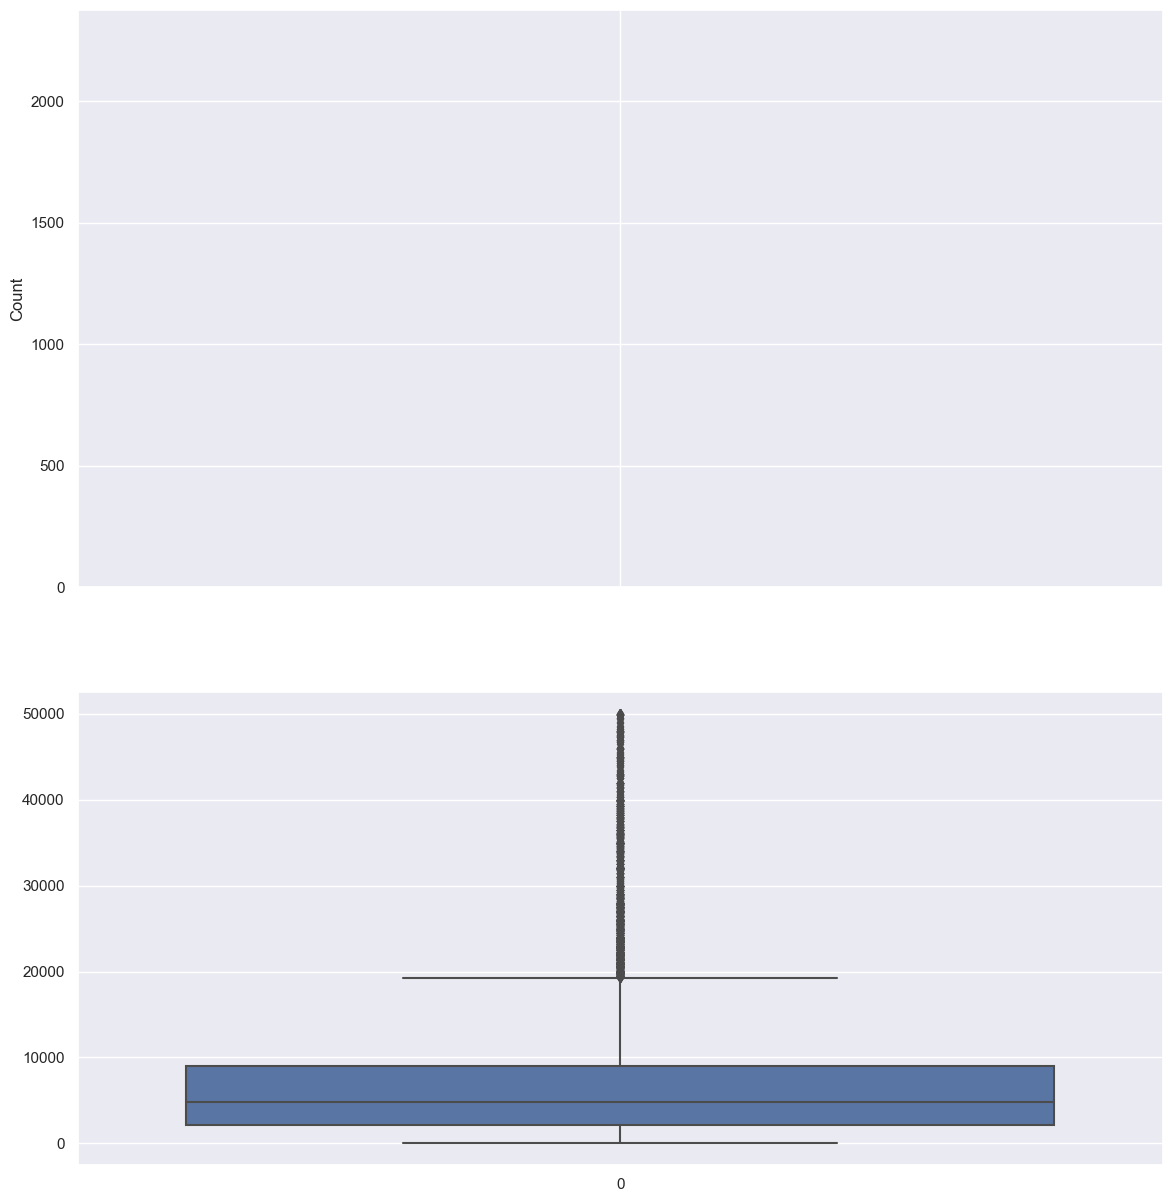

In [22]:
sns.set(rc={'figure.figsize':(14,15)})
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.55, .45)})
sns.histplot(df['price_usd'], ax=ax_hist)
sns.boxplot(df['price_usd'], ax=ax_box)
ax_hist.set(xlabel='')

Es posible calcular varios box-plot separando por una cierta variable categórica:

<Axes: xlabel='engine_fuel', ylabel='price_usd'>

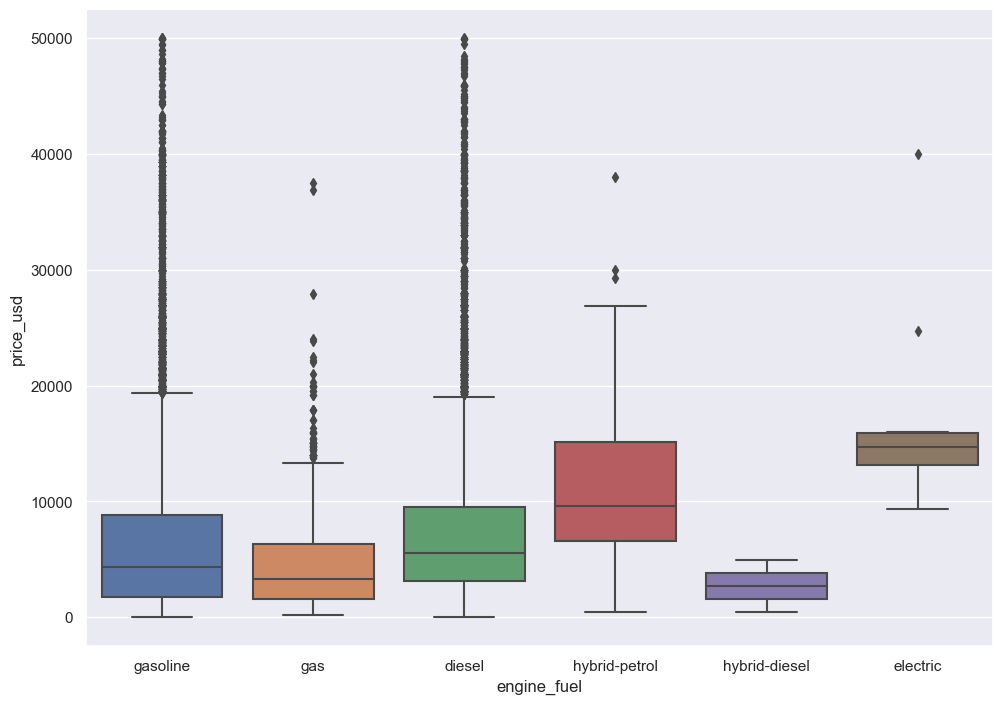

In [12]:
sns.boxplot(x = 'engine_fuel', y = 'price_usd', data = df)